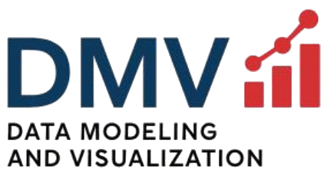

# **Week 7: Variants of Scatter plots, Bubble plots, Correlogram, Slopegraphs & PCA**

Let's import the important libraries and load the dataset.

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

penguins = sns.load_dataset('penguins').dropna()
print(penguins.shape)
penguins.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


penguin-body_part.avif

# **1. Scatter Plot**
Description: A basic scatter plot uses two numeric variables (X, Y) to visualize their relationship. All points are uniform in size and color.

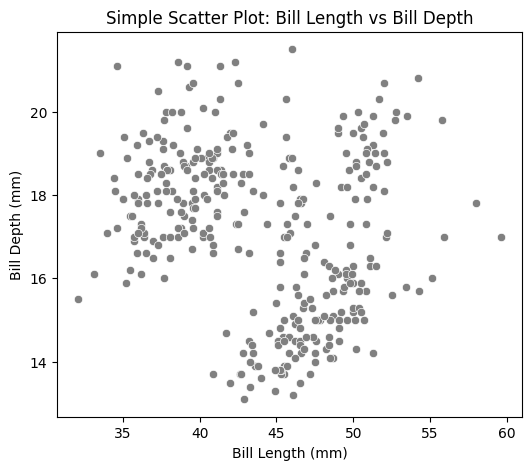

In [64]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', color='gray')
plt.title('Simple Scatter Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()


## **Scatter plot with different color for different species**

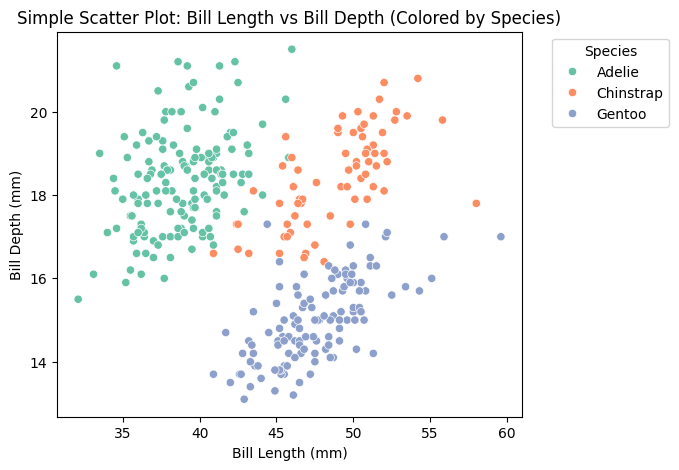

In [71]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='Set2')
plt.title('Simple Scatter Plot: Bill Length vs Bill Depth (Colored by Species)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1))
plt.show()


# **2. Bubble Plot**

Description: A bubble plot is a scatter plot where point size encodes a third variable. (e.g. Body size)

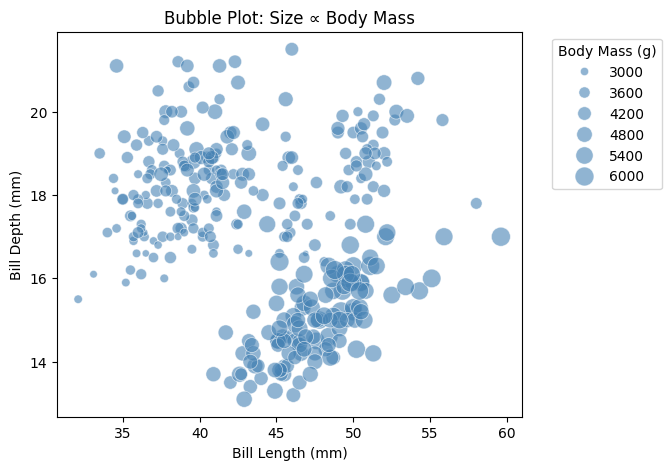

In [78]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                size='body_mass_g', alpha=0.6, color='steelblue', sizes=(20, 200))
plt.title('Bubble Plot: Size ∝ Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(bbox_to_anchor=(1.05, 1), title='Body Mass (g)')
plt.show()


## **Bubble plot with different color for different species**

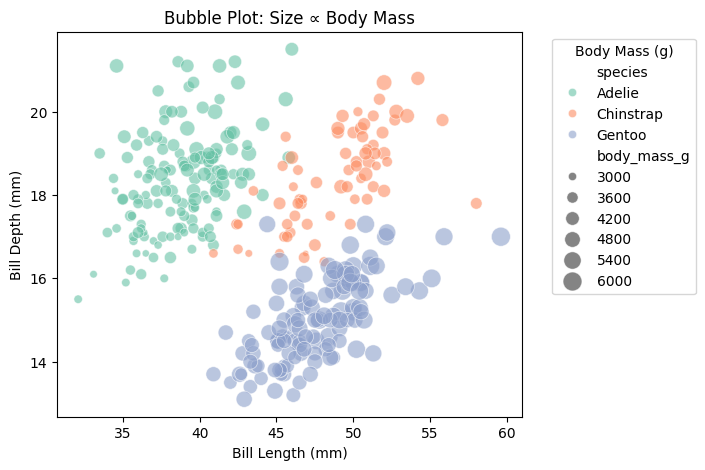

In [79]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                size='body_mass_g', alpha=0.6, hue='species', palette='Set2', sizes=(20, 200))
plt.title('Bubble Plot: Size ∝ Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(bbox_to_anchor=(1.05, 1), title='Body Mass (g)')
plt.show()


# **Differences between the Scatter plot and Bubble plot**

| Feature     | Scatter          | Bubble                    |
| ----------- | ---------------- | ------------------------- |
| Dimensions  | 2 (x, y)         | 3 (x, y, size)            |
| Marker size | Fixed            | Encodes numeric variable  |
| Use case    | Basic comparison | Emphasize scale/magnitude |


# **3. Grouped Scatter Plot**
Description: A grouped scatter plot categorizes points using color or marker style based on a categorical variable (e.g., species).

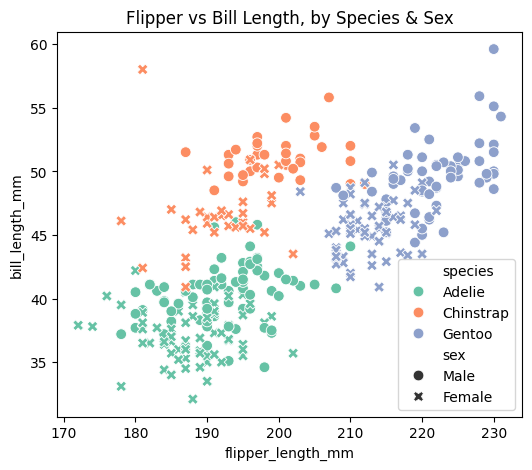

In [82]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
                style='sex', hue='species', palette='Set2', s=60)
plt.title('Flipper vs Bill Length, by Species & Sex')
plt.show()


# **Differences between the Scatter plot and Grouped plot**

| Feature      | Scatter       | Grouped Scatter        |
| ------------ | ------------- | ---------------------- |
| Coloring     | Uniform       | By category            |
| Marker style | Uniform       | Varies by category     |
| Use case     | General trend | Class-wise comparisons |


# **4. Multivariate Scatter Plot**
Description: A multivariate scatter plot encodes four variables using X, Y, color (hue), and size (or marker style)

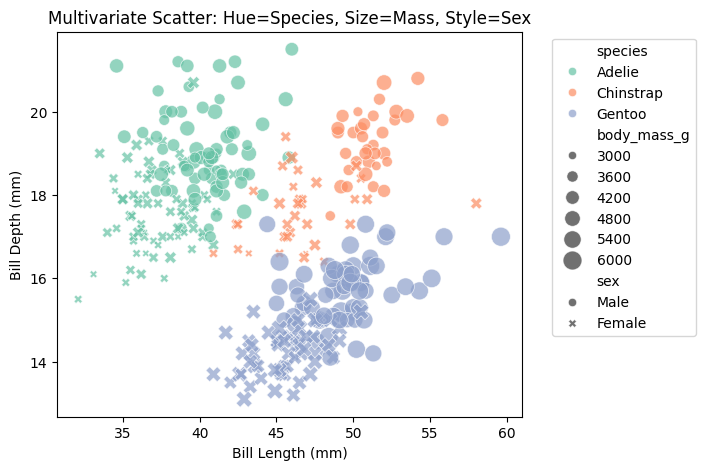

In [30]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species', size='body_mass_g', style='sex',
                alpha=0.7, sizes=(20, 200), palette='Set2')
plt.title('Multivariate Scatter: Hue=Species, Size=Mass, Style=Sex')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


# **Differences between the Scatter plot and Multivariate plot**

| Feature     | Scatter       | Multivariate Scatter            |
| ----------- | ------------- | ------------------------------- |
| Dimensions  | 2             | 4 (x, y, size, hue/style)       |
| Visual cues | Position only | Position + color + size + shape |
| Use case    | Simple trend  | Complex relationship insight    |


# **Summary of comparisons**

| Plot Type            | X, Y | Size | Style (Marker) | Use Case                          |
| -------------------- | ---- | ---- | -------------- | --------------------------------- |
| Simple Scatter       | ✅    | ❌    | ❌              | Basic two-variable relationship   |
| Bubble               | ✅    | ✅    | ❌              | Visualize magnitude               |
| Grouped Scatter      | ✅    | ❌    | ✅  | Compare groups/categories         |
| Multivariate Scatter | ✅    | ✅    | ✅              | Explore 4D relationships visually |


# **5. Correlogram**

Description: Correlogram is a matrix visualization of pairwise correlations.

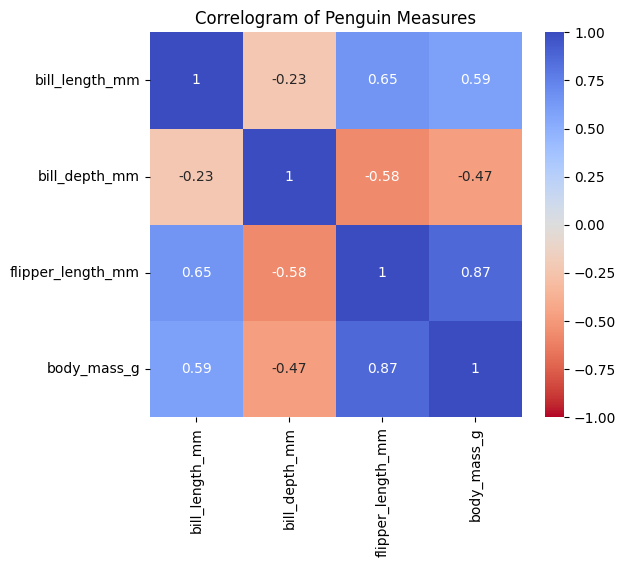

In [50]:
num = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
corr = num.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.title('Correlogram of Penguin Measures')
plt.show()


# **6. Slopegraph**
Description: Compares values across two time points per group.

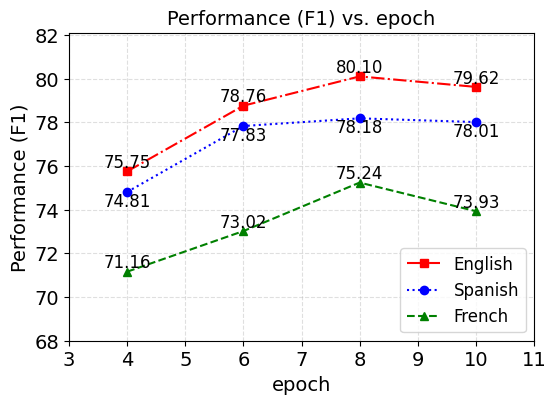

In [89]:
import numpy as np

# Data
epoch = [4, 6, 8, 10]
en_values = [75.75, 78.76, 80.10, 79.62]
sp_values = [74.81, 77.83, 78.18, 78.01]
fr_values = [71.16, 73.02, 75.24, 73.93]

# Plotting the line graph
plt.figure(figsize=(6, 4))
plt.plot(epoch, en_values, marker='s', linestyle='-.', label='English', color='red')
plt.plot(epoch, sp_values, marker='o', linestyle=':', label='Spanish', color='blue')
plt.plot(epoch, fr_values, marker='^', linestyle='--', label='French', color='green')

# Adding value labels on each point
for i in range(len(epoch)):
    plt.text(epoch[i], en_values[i], f'{en_values[i]:.2f}', ha='center', va='bottom', fontsize=12)
    plt.text(epoch[i], sp_values[i], f'{sp_values[i]:.2f}', ha='center', va='top', fontsize=12)
    plt.text(epoch[i], fr_values[i], f'{fr_values[i]:.2f}', ha='center', va='bottom', fontsize=12)

# Setting plot labels and title
plt.xlabel(r'epoch', fontsize=14)
plt.ylabel('Performance (F1)', fontsize=14)
plt.title('Performance (F1) vs. epoch', fontsize=14)
plt.legend(fontsize=12,loc="lower right")
plt.xticks(np.arange(3,12,1),fontsize=14)
plt.yticks(fontsize=14)

# Adjusting y-axis range starting from 68
plt.ylim(68, max(max(fr_values), max(sp_values), max(en_values)) + 2)

# Add grid
plt.grid(True, linestyle='--', alpha=0.4)

# **7. Principal Component Analysis (PCA)**

**PCA**, or Principal Component Analysis, is a **dimensionality reduction** technique used to simplify data by reducing the number of variables while retaining the most important information. It achieves this by **transforming the original variables** into a **new set of uncorrelated variables** called principal components, which are ordered by the amount of variance they explain in the data.

In [90]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load dataset (The famous Iris dataset)
iris = sns.load_dataset('iris')
X = iris.drop(columns='species')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


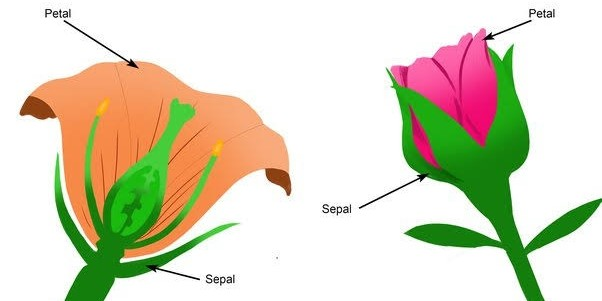

## **Now, let's perform PCA on Iris dataset.**

In [91]:
# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [92]:
X_pca[0]

array([-2.26470281,  0.4800266 ,  0.12770602, -0.0241682 ])

# **7.1. Scree Plot**
Description: The scree plot shows how much variance each principal component explains.

It helps decide how many components to retain

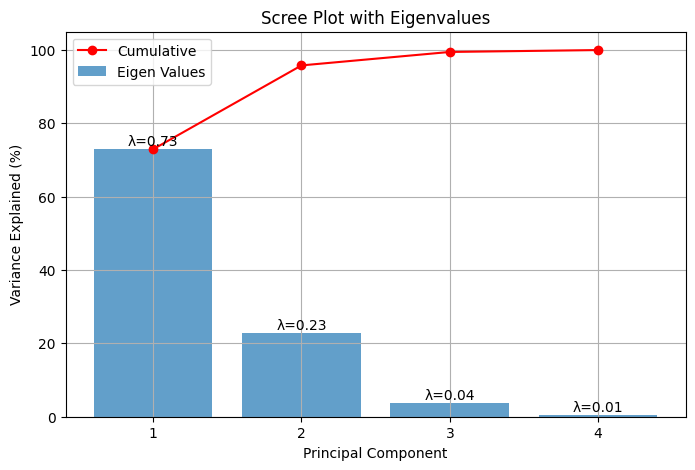

In [93]:
explained_var = pca.explained_variance_ratio_
eigen_vals = pca.explained_variance_
sum_eigen = sum(eigen_vals)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_var)+1), explained_var*100, alpha=0.7, label='Eigen Values')
plt.plot(range(1, len(explained_var)+1), np.cumsum(explained_var)*100, marker='o', color='red', label='Cumulative')

for i, ev in enumerate(eigen_vals):
    plt.text(i+1, explained_var[i]*100 + 1, f"λ={ev/sum_eigen:.2f}", ha='center')

plt.xticks(range(1, len(explained_var)+1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot with Eigenvalues')
plt.legend()
plt.grid(True)
plt.show()


**Interpretation of the Scree Plot:**

* `λ (eigenvalue)` represents the variance captured by a component.

* First 2 PCs (Principal Components) often explain most variance in high-dimensional data.

# **7.2. Loading Plot (Variable Contributions to PCs)**
Description: Loadings are the correlation between original features and PCs. They show which features influence which principal components.

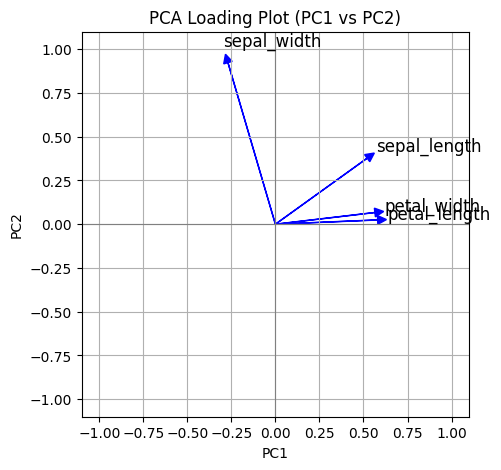

In [95]:
# Loadings: contribution of features to PC1 and PC2
loadings = pd.DataFrame(pca.components_.T[:, :2],
                        columns=['PC1', 'PC2'],
                        index=X.columns)

plt.figure(figsize=(5, 5))
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

for feature in loadings.index:
    x, y = loadings.loc[feature]
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    plt.text(x*1.1, y*1.1, feature, fontsize=12)

plt.title('PCA Loading Plot (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.show()


**Interpretation of the Loading plot:**

* Direction and length of arrows show importance and contribution.

* E.g., `petal length` contributes strongly to **PC1** if the arrow points far on x-axis, but `sepal_width` contributes strongly to **PC2** as the arrow points far on y-axis.

## **Summary of key terms**

| Term                         | Meaning                                                   |
| ---------------------------- | --------------------------------------------------------- |
| **Principal Component (PC)** | Linear combination of features capturing maximum variance |
| **Explained Variance Ratio** | Fraction of total variance explained by each PC           |
| **Eigenvalue (λ)**           | Variance captured by each PC                              |
| **Loading**                  | Contribution of original variable to a PC                 |


# **8. Importance of PCA**

Let's plot Sepal Length vs Sepal Width

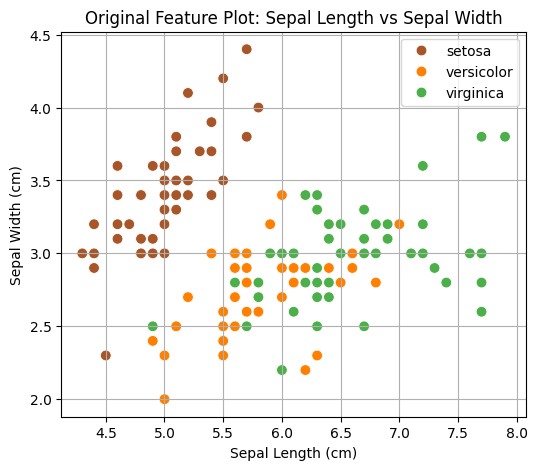

In [98]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette='Set1_r', s=60)
plt.title('Original Feature Plot: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()


**Observation:**

Good separation of `Setosa`, but overlap between `Versicolor` and `Virginica`.

### **Now, let's plot the PCs**

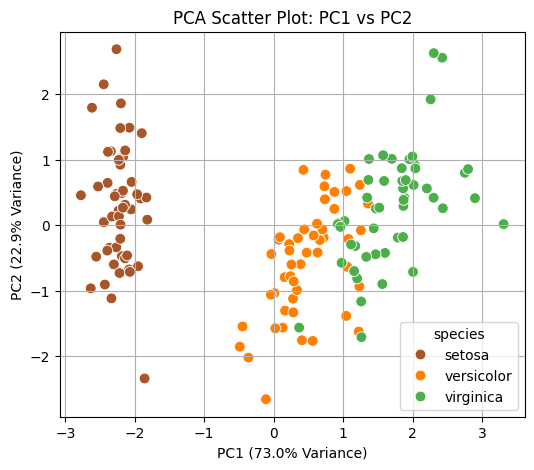

In [99]:
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['species'] = iris['species']

plt.figure(figsize=(6, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set1_r', s=60)
plt.title('PCA Scatter Plot: PC1 vs PC2')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)')
plt.grid(True)
plt.show()


**Observation:**

* Much better separation across all 3 species.

* PCA combines all 4 features to find optimal separating axes.

## **How are the PCs got created**
Let's check how each original feature contributes to PC1 and PC2.

In [39]:
loadings = pd.DataFrame(pca.components_.T[:, :2],
                        columns=['PC1', 'PC2'],
                        index=X.columns)
print("PCA Loadings (coefficients):")
print(loadings)


PCA Loadings (coefficients):
                   PC1       PC2
sepal_length  0.521066  0.377418
sepal_width  -0.269347  0.923296
petal_length  0.580413  0.024492
petal_width   0.564857  0.066942


*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*